# Gold Price Study by Visualization and Machine Learning

## 1.Introduction 

The purpose of the study is though analyzing the historical gold data, to find out the pattern of the gold price movement and further predict its future price. In this paper I have conducted the analysis based on two part. The first part I have conducted a visualization of the past gold price movement and the second part, was conducted based on a supervised machine learning algorithm: regression. 

To do so, I have explored two CSV data file from GitHub:

•	Gold ETF.csv, within this data frames contains the gold trading price from 2008 – 2018 from (exchange-traded-funds) including details as open price, close price, volume and so on.

•	Gold price.csv, this file contains only the gold price data since 1978 to 2018, which provides us a bigger picture of the historical movement of the gold price 

The gold is through data analysis, to reach useful insides for traders for their investments, such as is there any fixed pattern of the gold price movement, what are the biggest variables drives the increase or decrease of the gold price, or any possible methods on making profit in the gold trading market.

In [24]:
# We will use the following import conventions 
import numpy as np
import pandas as pd
import datetime as dt
from pandas import Series, DataFrame
from matplotlib import rcParams
#visualization
import matplotlib.pyplot as plt
#regression prediction
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## 2. Load Data and Data Clearing

I have imported two files in the notebook and using the datetime function, converted the original file date information into datetime

In [2]:
etf_data = pd.read_csv('gold ETF.csv')
#etf_data.info() # to check the format of the data loaded
# convert the date information from object to datetime function
Date = pd.to_datetime(etf_data['Data'],dayfirst=True)
etf_data['Data'] = Date

gold_price_data = pd.read_csv('gold price.csv')
#gold_price_data.info()
gold_date = pd.to_datetime(gold_price_data['Data'])
gold_price_data['Data'] = gold_date

In [3]:
etf_data.head(5)

,Data,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,83.559998,85.139999,83.440002,84.860001,84.860001,12291100
1,2008-01-03,84.870003,85.940002,84.599998,85.570000,85.570000,9553900
2,2008-01-04,85.339996,85.550003,84.430000,85.129997,85.129997,8402200
3,2008-01-07,85.239998,85.260002,84.570000,84.769997,84.769997,6944300
4,2008-01-08,86.279999,87.129997,86.160004,86.779999,86.779999,9567900


In [4]:
gold_price_data.head(5)

,Data,US DOLLAR (onces)
0,1978-12-31,207.8
1,1979-01-31,227.3
2,1979-02-28,245.7
3,1979-03-30,242.1
4,1979-04-30,239.2


## 3. Data Visualization

By plotting the historical gold price data, we can see the gold price has increased rapidly since 2000 and had another boost in 2008. One reason of the rapid boost of the gold price is due to entering to 21 centuries the development of the technology had made investment on financial product more accessible to the public, and the boost in 2008 can be explain be the world financial crisis in 2008, as when the economy slows down, the investors generally tend to invest on gold as it has relatively stable long-term return on investment.

Therefore, as the longer term is strongly depending on the black swan event which is nearly impossible to predict, so I have selected the period from 2008 to 2018 which the gold price is relatively steady, which can be used to determine whether during these period, the gold price movement follows some kind of pattern.

Moreover, though plotting a box graph of the gold price data since 1978 we can have an even clear idea of how significant the difference are between the lowest price and highest price is and mean lowest and highest price.

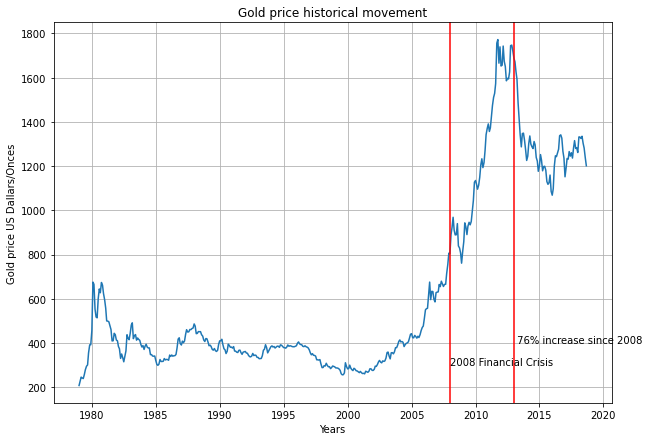

In [82]:
gold_price_data_graph = gold_price_data.set_index('Data')
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(gold_price_data_graph.index, gold_price_data_graph['US DOLLAR (onces)'])
ax.set_xlabel('Years')
ax.set_ylabel('Gold price US Dallars/Onces')
ax.set_title('Gold price historical movement')
ax.annotate('2008 Financial Crisis', xy=[pd.Timestamp('2008'),300])
ax.annotate(' 76% increase since 2008', xy=[pd.Timestamp('2013'),400])
plt.axvline(pd.Timestamp('2008'), color='r')
plt.axvline(pd.Timestamp('2013'), color='r')
plt.grid(True)

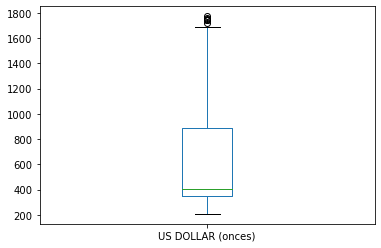

In [78]:
gold_price_data.plot(y = 'US DOLLAR (onces)', kind ='box')
plt.show()

### Data visualization gold price 2008-2018

In [6]:
etf_graph = etf_data.set_index('Data')
etf_graph.head()

,Open,High,Low,Close,Adj Close,Volume
Data,,,,,,
2008-01-02,83.559998,85.139999,83.440002,84.860001,84.860001,12291100
2008-01-03,84.870003,85.940002,84.599998,85.570000,85.570000,9553900
2008-01-04,85.339996,85.550003,84.430000,85.129997,85.129997,8402200
2008-01-07,85.239998,85.260002,84.570000,84.769997,84.769997,6944300
2008-01-08,86.279999,87.129997,86.160004,86.779999,86.779999,9567900


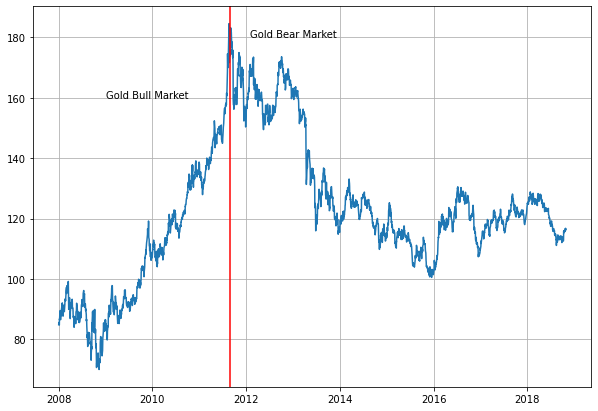

In [73]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(etf_graph.index, etf_graph['Close'])
plt.axvline(pd.Timestamp('2011-9-01'), color='r')
plt.annotate('Gold Bull Market', xy=[pd.Timestamp('2009'),160])
plt.annotate('Gold Bear Market', xy=[pd.Timestamp('2012-01-30'),180])
plt.grid(True)

From the 2008 to mid of 2019 the gold market is in a bull market, which refers the market is in a continuous increasing phase, we previously mentioned, during an economy downturn the gold price generally will have an increase on its price due to its long-term return on investment standability, reversely after that the market was in a bear market, a continuous decrease phase, and the rest of year, the market is in a steady floating market.

In comparison with the previous box graph we can see the difference between the highest and lowest price and its mean highest and lowest piece gap are significantly lower, which provides a better environment for seeking a price movement pattern and prediction, therefore in the further analysis, I have focused on the price data between 2008 to 2018.

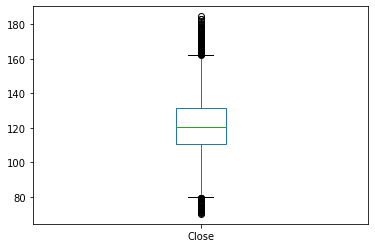

In [74]:
gold_price_data.plot(y = '', kind ='box')
plt.show()

## 4. The V shape pattern of the Gold Price ###

All the mature gold traders, seems to be believing a V shape hypothesis, the hypothesis stands for; during the end of the year and the start of the next year, is where the gold price will present a V shape pattern. This refers in the mid of each year’s December the gold price will be decreasing reaching its lowest price point in the mid of December and bounce back in the next years January, formatting a V shape gold price patter, if this pattern holds truth, it is extremely variable for the gold traders, as they can buy the gold with a low price in December and sell it on the higher price in January. Based on this information, I’ll like to determine whether this pattern holds the truth. In both the bull and bear market between 2008 to 2018.

In [81]:
#find the max averange months.
month_mean = etf_graph.loc[:,'Close'].resample('M').mean()
to_dataframe = month_mean.to_frame().reset_index()
years_month_avr = to_dataframe.set_index('Data')
print(years_month_avr.resample('Y').max())

# to compare with the year mean
#year_mean = etf_graph.loc[:,'Close'].resample('Y').mean()
#print(year_mean)

                 Close
Data                  
2008-12-31   94.982500
2009-12-31  110.674000
2010-12-31  135.936819
2011-12-31  171.817618
2012-12-31  169.552105
2013-12-31  161.673332
2014-12-31  128.600952
2015-12-31  120.384501
2016-12-31  127.836500
2017-12-31  124.922001
2018-12-31  126.576191


I have first analyzed the maximum monthly mean of each year, because if this hypothesis holds true, then during the December should be the month which has the most trade volume in compare with rest of the year, as the investors started purchasing the gold, in the mid of the December in a low price point to be able to sell it, on a high price point in January.

Though calculating the mean of each month for years between 2008 to 2018, with resample methods and further found the max of the monthly mean for each year, I have surprisedly found that the fact every year from 2008 to 2018, December does have the maximum trade volume, which can be a strong backup of the V shape hypothesis.

In [10]:
# the price movement of 2011
data_2011 = etf_graph.loc['2011-11-01':'2012-2-02']
data_2012 = etf_graph.loc['2012-11-01':'2013-2-02']
data_2013 = etf_graph.loc['2013-11-01':'2014-02-02']
data_2014 = etf_graph.loc['2014-11-01':'2015-2-02']
data_2015 = etf_graph.loc['2015-11-01':'2016-2-02']
data_2016 = etf_graph.loc['2016-11-01':'2017-02-02']
data_2017 = etf_graph.loc['2017-11-01':'2018-2-02']

Based on the previous insides we found, during the December is where all years has the maximum monthly mean. Therefore, I have selected data’s based on time period from the November the first to February the second, to determine, the V shape hypothesis.

However, I have excluded the year 2008 and 2009, as previously mentioned, the biggest independent variables of the gold price are the black swan events, such as 2008 financial crisis, based on the unpredictability of those invent, it is rational to exclude the period where the price has been affected by those invents.

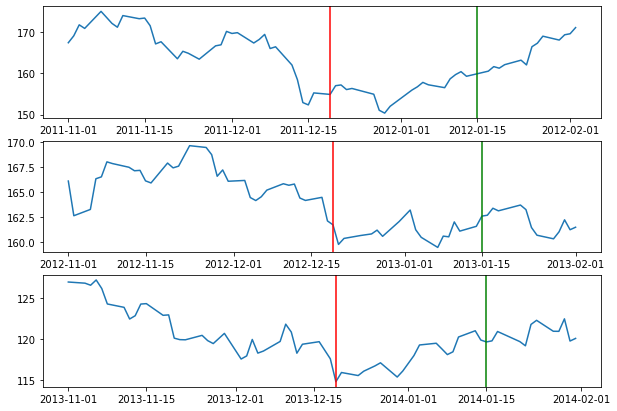

In [22]:
fig, ax = plt.subplots(3, 1,figsize=(10, 7))
ax[0].plot(data_2011.index,data_2011['Close'])
ax[0].axvline(pd.Timestamp('2011-12-19'), color='r')
ax[0].axvline(pd.Timestamp('2012-01-15'), color='g')
ax[1].plot(data_2012.index,data_2012['Close'])
ax[1].axvline(pd.Timestamp('2012-12-19'), color='r')
ax[1].axvline(pd.Timestamp('2013-01-15'), color='g')
ax[2].plot(data_2013.index,data_2013['Close'])
ax[2].axvline(pd.Timestamp('2013-12-19'), color='r')
ax[2].axvline(pd.Timestamp('2014-01-15'), color='g')

I have plotted the datetime based selected period data of 2011, 2012 and 2013 into graphs, and it does show a V shape gold price movement ranged around December to January of the upcoming year. I have further plotted a red line (December 19th) indicating buying point and green line (January 15th) as selling point for all these years. 
As we can see for all these three year, this method will be profitable if it has been applied, as the price point of the green line is always higher than the red line.

To further prof the V shape hypothesis, we can apply the same trading plan with other year, to see whether it will still be profitable.

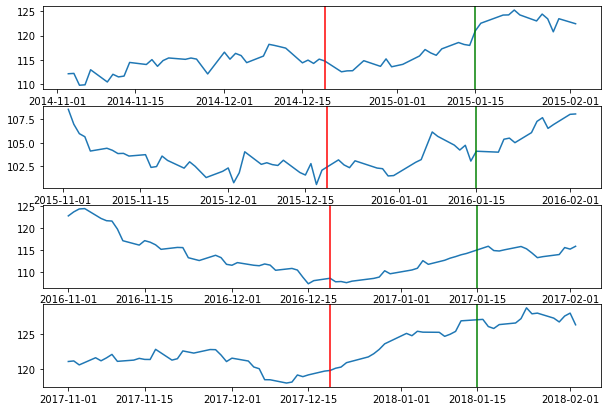

In [20]:
fig, ax = plt.subplots(4, 1,figsize=(10, 7))
ax[0].plot(data_2014.index,data_2014['Close'])
ax[0].axvline(pd.Timestamp('2014-12-19'), color='r')
ax[0].axvline(pd.Timestamp('2015-01-15'), color='g')
ax[1].plot(data_2015.index,data_2015['Close'])
ax[1].axvline(pd.Timestamp('2015-12-19'), color='r')
ax[1].axvline(pd.Timestamp('2016-01-15'), color='g')
ax[2].plot(data_2016.index,data_2016['Close'])
ax[2].axvline(pd.Timestamp('2016-12-19'), color='r')
ax[2].axvline(pd.Timestamp('2017-01-15'), color='g')
ax[3].plot(data_2017.index,data_2017['Close'])
ax[3].axvline(pd.Timestamp('2017-12-19'), color='r')
ax[3].axvline(pd.Timestamp('2018-01-15'), color='g')

Surprisingly, 2014, 2015, 2016 and 2017 all of the graph has shown a V shape pattern, moreover, by plotting the buying red line (December 19th) and selling green line (January 15th), all those years will also be profitable, as the selling price is higher than buying price, this may provide a reference of the V shape hypothesis and the reason of the highest trade volume in December for every years since 2008 to 2018.

# 5. Supervised Learning: Regression#

In this machine learning part, I’ll like to know, weather the independent variable gold trade volume’s has correlation with the dependent variable gold price, if the gold price volume has a relatively significant effect on the gold price, then we will be able to conduct a prediction of based on that, with the help of a supervised learning algorithm, regression. 

Furthermore, I will apply the prediction by setting the test sets and train sets, I have extract 30% of the data as the test sets and rest 70% as the train data. To determine whether the prediction’s reliability.

### Train/test split for regression (mean squared error)

In [51]:
# Import necessary modules
X = etf_data[['Volume']]
y = etf_data[['Close']]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -0.002091622673386251
Root Mean Squared Error: 23.27335652762484


In this regression analysis, I have determined the price as the depended variable and only volume as the independent variable, depside there are more data on the dataframe, however, those data can have collinearity issues with the dependent variable, which is not statistically applicable for running the regression algorithm, therefore, the volume it is also the only useable independent variable. 

By the result showing of R^2 and root mean squared error, we can conclude that this prediction algorithms are not reliable. Personally, I consider the reason of the bad prediction performance is due to the lack of information, there are just too many omitted variables which affect the gold price, especially as mentioned, the price of gold is strongly affected by the unpredictable black swan event, therefore I conclude the prediction of the reliable gold price is not possible.

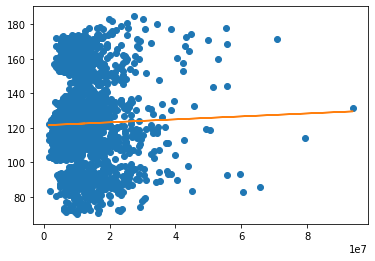

In [79]:
etf_prediction =  pd.read_csv('gold ETF.csv')
y = etf_prediction['Close'].values.flatten()
X = etf_prediction['Volume'].values.flatten()
m, b = np.polyfit(X, y, 1)
plt.plot(X, y, 'o')
plt.plot(X, m*X + b)
#

Finally, I have plotted a scatter graph, for all the observations of the volume as x-axis and close price as the y-axis, then draw a line of the best fit, as the graph shows there presents no representable coefficient between the volume and close price, which matches with the conclusion of the previous regression analysis.

# 6. Conclusion 

Despite the poor performance of the prediction due to the lack of importation, which leads the omitted variable problem within the regression algorithms, the study has provided important insides of the gold price. Tough visualizing the data, we have found strong backups for the V shape hypothesis of the gold price, the V shape pattern clarification can provide a strong reference for the gold traders for their future decision making. Where we will know generally during December the gold trade volume is the highest for the entered year, and the V shape patter based on the data from 2011-2017 holds true and can be further applied in future. Lastly from a longer-term speaking the gold price has a stable investment return and the black swan event can boost the gold price.

### Recommendations

•	End of each year is a good opportunity for gold investment

•	During a big financial crisis or any black swan event which largely damages the economy it is a good time to invest on gold 

•	A precise short term gold price prediction is not realistic, gold should be investing based for a longer term investment, instead of day to day investment

### Further Research 

•	Clarification of the V shape pattern applying years 2019 – 2020

•	Whether the Coved-19 pandemic has boosted the gold price